### **"Behavioral similarities Analysis Among Twitter Users."**

**Contributed by:**
**1. Divyanshi Bhojak**
**2. Tarushi Jat**

---



### **Necessary Import**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit
import scipy

### **Data Loading**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
user_data = pd.read_csv("/content/drive/MyDrive/Projects/datasets_full.csv/genuine_accounts.csv/users.csv")

In [ ]:
bot1_data = pd.read_csv("/content/drive/MyDrive/Projects/datasets_full.csv/social_spambots_1.csv/users.csv")

In [ ]:
bot2_data = pd.read_csv("/content/drive/MyDrive/Projects/datasets_full.csv/social_spambots_2.csv/users.csv")

In [ ]:
bot3_data = pd.read_csv("/content/drive/MyDrive/Projects/datasets_full.csv/social_spambots_3.csv/users.csv")

In [ ]:
bot1_data.head(3)

,id,name,screen_name,statuses_count,followers_count,friends_count,favourites_count,listed_count,url,lang,time_zone,location,default_profile,default_profile_image,geo_enabled,profile_image_url,profile_banner_url,profile_use_background_image,profile_background_image_url_https,profile_text_color,profile_image_url_https,profile_sidebar_border_color,profile_background_tile,profile_sidebar_fill_color,profile_background_image_url,profile_background_color,profile_link_color,utc_offset,is_translator,follow_request_sent,protected,verified,notifications,description,contributors_enabled,following,created_at,timestamp,crawled_at,updated,test_set_1
0,24858289,Davide Bertoli,davideb66,1299,22,40,1,0,NaN,it,Rome,NaN,1.0,1.0,1.0,http://abs.twimg.com/sticky/default_profile_im...,NaN,1.0,https://abs.twimg.com/images/themes/theme1/bg.png,333333,https://abs.twimg.com/sticky/default_profile_i...,C0DEED,NaN,DDEEF6,http://abs.twimg.com/images/themes/theme1/bg.png,C0DEED,0084B4,7200.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tue Mar 17 08:51:12 +0000 2009,2009-03-17 09:51:12,2014-04-19 14:46:19,2016-03-15 14:12:22,1
1,33212890,Elisa D'Ospina,ElisaDospina,18665,12561,3442,16358,110,http://t.co/ceK8TovxwI,it,Greenland,Italy,NaN,NaN,1.0,http://pbs.twimg.com/profile_images/2603147033...,https://pbs.twimg.com/profile_banners/33212890...,1.0,https://pbs.twimg.com/profile_background_image...,333333,https://pbs.twimg.com/profile_images/260314703...,FFFFFF,1.0,F3F3F3,http://pbs.twimg.com/profile_background_images...,EBEBEB,990000,-7200.0,NaN,NaN,NaN,NaN,NaN,Autrice del libro #unavitatuttacurve dal 9 apr...,NaN,NaN,Sun Apr 19 14:38:04 +0000 2009,2009-04-19 16:38:04,2014-05-18 23:20:58,2016-03-15 14:17:13,1
2,39773427,Donato Vincenzo,Vladimir65,22987,600,755,14,6,NaN,it,Rome,"iPhone: 45.471680,9.192429",NaN,NaN,NaN,http://pbs.twimg.com/profile_images/2290354446...,https://pbs.twimg.com/profile_banners/39773427...,1.0,https://pbs.twimg.com/profile_background_image...,333333,https://pbs.twimg.com/profile_images/229035444...,FFFFFF,1.0,EFEFEF,http://pbs.twimg.com/profile_background_images...,131516,009999,7200.0,NaN,NaN,NaN,NaN,NaN,[Live Long and Prosper],NaN,NaN,Wed May 13 15:34:41 +0000 2009,2009-05-13 17:34:41,2014-05-13 23:21:54,2016-03-15 14:16:44,1


In [ ]:
bot2_data.head(3)

,id,name,screen_name,statuses_count,followers_count,friends_count,favourites_count,listed_count,url,lang,time_zone,location,default_profile,default_profile_image,geo_enabled,profile_image_url,profile_banner_url,profile_use_background_image,profile_background_image_url_https,profile_text_color,profile_image_url_https,profile_sidebar_border_color,profile_background_tile,profile_sidebar_fill_color,profile_background_image_url,profile_background_color,profile_link_color,utc_offset,is_translator,follow_request_sent,protected,verified,notifications,description,contributors_enabled,following,created_at,timestamp,crawled_at,updated
0,2372241176,Denna Mcsparren,DennaMcsparren,53,10,46,0,0,NaN,en,NaN,NaN,NaN,NaN,NaN,http://pbs.twimg.com/profile_images/4414666952...,NaN,1,https://pbs.twimg.com/profile_background_image...,333333,https://pbs.twimg.com/profile_images/441466695...,FFFFFF,1.0,DDEEF6,http://pbs.twimg.com/profile_background_images...,0000FF,0000FF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tue Mar 04 18:11:08 +0000 2014,2014-03-04 19:11:08,2014-05-05 00:20:03,2016-03-15 15:02:07
1,2368684734,Yukiko Tretter,YukikoTretter,68,4,40,0,0,NaN,en,NaN,NaN,NaN,NaN,NaN,http://pbs.twimg.com/profile_images/4414788428...,NaN,1,https://pbs.twimg.com/profile_background_image...,333333,https://pbs.twimg.com/profile_images/441478842...,FFFFFF,1.0,DDEEF6,http://pbs.twimg.com/profile_background_images...,0000FF,0000FF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sun Mar 02 10:38:13 +0000 2014,2014-03-02 11:38:13,2014-05-05 00:20:47,2016-03-15 15:02:07
2,2353855646,Rochel Amaro,RochelAmaro,79,9,39,0,0,NaN,en,NaN,NaN,NaN,NaN,NaN,http://pbs.twimg.com/profile_images/4373720034...,NaN,1,https://pbs.twimg.com/profile_background_image...,333333,https://pbs.twimg.com/profile_images/437372003...,FFFFFF,1.0,DDEEF6,http://pbs.twimg.com/profile_background_images...,0000FF,0000FF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Thu Feb 20 22:28:03 +0000 2014,2014-02-20 23:28:03,2014-05-05 00:20:03,2016-03-15 15:02:08


In [ ]:
bot3_data.head(3)

,id,name,screen_name,statuses_count,followers_count,friends_count,favourites_count,listed_count,url,lang,time_zone,location,default_profile,default_profile_image,geo_enabled,profile_image_url,profile_banner_url,profile_use_background_image,profile_background_image_url_https,profile_text_color,profile_image_url_https,profile_sidebar_border_color,profile_background_tile,profile_sidebar_fill_color,profile_background_image_url,profile_background_color,profile_link_color,utc_offset,is_translator,follow_request_sent,protected,verified,notifications,description,contributors_enabled,following,created_at,timestamp,crawled_at,updated,test_set_2
0,16282004,Enrique Kates,eckates,11405,819,2000,0,19,http://t.co/gAa6cVM0Fe,en,Eastern Time (US & Canada),"Florida, USA",1.0,NaN,NaN,http://pbs.twimg.com/profile_images/1080839420...,NaN,1.0,https://abs.twimg.com/images/themes/theme1/bg.png,333333,https://pbs.twimg.com/profile_images/108083942...,C0DEED,NaN,DDEEF6,http://abs.twimg.com/images/themes/theme1/bg.png,C0DEED,0084B4,-14400.0,NaN,NaN,NaN,NaN,NaN,My name is Enrique! ! I'm a highly experienced...,NaN,NaN,Sun Sep 14 11:20:09 +0000 2008,2008-09-14 13:20:09,2014-05-05 23:17:51,2016-03-15 15:41:18,1
1,16740486,genebailey,genebailey,520,219,406,36,2,http://t.co/mag9oYulVZ,en,Central Time (US & Canada),"32.921043,-97.200378",NaN,NaN,1.0,http://pbs.twimg.com/profile_images/1595252913...,https://pbs.twimg.com/profile_banners/16740486...,1.0,https://pbs.twimg.com/profile_background_image...,3E4415,https://pbs.twimg.com/profile_images/159525291...,829D5E,NaN,99CC33,http://pbs.twimg.com/profile_background_images...,352726,D02B55,-18000.0,NaN,NaN,NaN,NaN,NaN,"Author, Speaker, Father, Friend, Motivator, Re...",NaN,NaN,Tue Oct 14 16:11:24 +0000 2008,2008-10-14 18:11:24,2014-05-05 23:17:51,2016-03-15 15:41:15,1
2,17132768,Patrick G Howard,patrickghoward,4671,38877,25953,6,228,http://t.co/0ukMNj4N3Y,en,Central Time (US & Canada),"Houston, Texas USA",NaN,NaN,NaN,http://pbs.twimg.com/profile_images/4181686842...,NaN,1.0,https://abs.twimg.com/images/themes/theme15/bg...,333333,https://pbs.twimg.com/profile_images/418168684...,A8C7F7,NaN,C0DFEC,http://abs.twimg.com/images/themes/theme15/bg.png,022330,0084B4,-18000.0,NaN,NaN,NaN,NaN,NaN,Patrick G Howard is an experienced project & p...,NaN,NaN,Mon Nov 03 15:51:00 +0000 2008,2008-11-03 16:51:00,2014-05-05 23:17:51,2016-03-15 15:41:15,1


### **Length of Files**

In [ ]:
print("Count of data of legitimate accounts : ", len(user_data))
print("Count of data of accounts of bot user group - 1 : ", len(bot1_data))
print("Count of data of accounts of bot user group - 2 : ", len(bot2_data))
print("Count of data of accounts of bot user group - 3 : ",len(bot3_data))

Count of data of legitimate accounts :  3474
Count of data of accounts of bot user group - 1 :  991
Count of data of accounts of bot user group - 2 :  3457
Count of data of accounts of bot user group - 3 :  464


In [ ]:
a = len(user_data)
b = len(bot1_data)
c = len(bot2_data)
d = len(bot3_data)

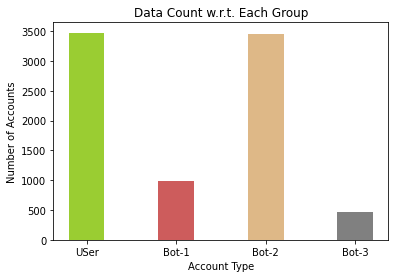

In [ ]:
import matplotlib.pyplot as plt
# creating the dataset
data = {'USer':a, 'Bot-1':b, 'Bot-2':c,
        'Bot-3':d}
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (6, 4))
 
# creating the bar plot
plt.bar(courses, values, color=['yellowgreen', 'indianred', 'burlywood', 'grey'],
        width = 0.4)
 
plt.xlabel("Account Type")
plt.ylabel("Number of Accounts")
plt.title("Data Count w.r.t. Each Group")
plt.show()

### **Follower vs Friend ratio**

Follower vs Friend Ratio is defined as the number of people you are following & the number of people following you.

If the number of follower is relatively small compared to the amount of people you are following, the follower ratio is relatively small & account being spam is high.

**For Legitimate Accounts**

In [ ]:
user = user_data.followers_count/(user_data.friends_count + user_data.followers_count)
print(user)

0       0.385185
1       0.404908
2       0.483965
3       0.696191
4       0.210000
          ...   
3469    0.136035
3470    0.812878
3471    0.116883
3472    0.134868
3473    0.820428
Length: 3474, dtype: float64


In [ ]:
print(np.nanmean(user))

0.5027722347999382


**Follower Ratio Bot User Group-1**

In [ ]:
bot1 = bot1_data.followers_count/(bot1_data.friends_count + bot1_data.followers_count)
print(bot1)

0      0.354839
1      0.784915
2      0.442804
3      0.532086
4      0.504890
         ...   
986    0.479084
987    0.482977
988    0.477110
989    0.553275
990    0.346029
Length: 991, dtype: float64


In [ ]:
print(np.nanmean(bot1))


0.5237114689719357


**Follower Ratio for Bor User Group-2**

In [ ]:
bot2 = bot2_data.followers_count/(bot2_data.friends_count + bot2_data.followers_count)
print(bot2)

0       0.178571
1       0.090909
2       0.187500
3       0.025000
4       0.162791
          ...   
3452    0.094855
3453    0.187500
3454    0.108108
3455    0.118243
3456    0.166667
Length: 3457, dtype: float64


In [ ]:
print(np.nanmean(bot2))

0.11543068901989084


**Follower Ratio for Bor User Group-3**

In [ ]:
bot3 = bot3_data.followers_count/(bot3_data.friends_count + bot3_data.followers_count)
print(bot3)

0      0.290529
1      0.350400
2      0.599676
3      0.637400
4      0.471221
         ...   
459    0.148148
460    0.090909
461    0.189542
462    0.245726
463    0.119153
Length: 464, dtype: float64


In [ ]:
print(np.nanmean(bot3))

0.3778966696976445


In [ ]:
print("Follower Ratio of Legitimate Users:- ", np.nanmean(user))
print("Follower Ratio of  Group-1 Bots:- ", np.nanmean(bot1))
print("Follower Ratio of Group-2 Bots:- ", np.nanmean(bot2))
print("Follower Ratio of Group-3 Bots:- ", np.nanmean(bot3))

Follower Ratio of Legitimate Users:-  0.5027722347999382
Follower Ratio of  Group-1 Bots:-  0.5237114689719357
Follower Ratio of Group-2 Bots:-  0.11543068901989084
Follower Ratio of Group-3 Bots:-  0.3778966696976445


### **Followers vs. Friends Plot**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

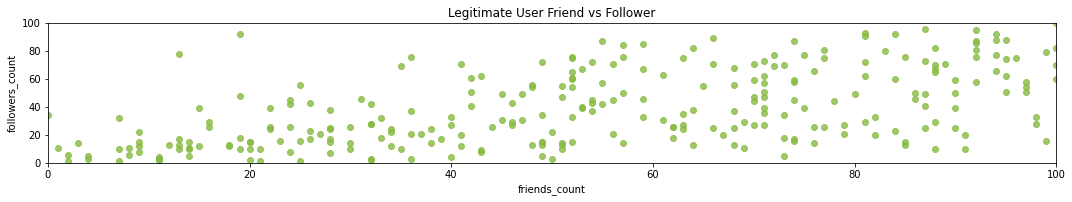

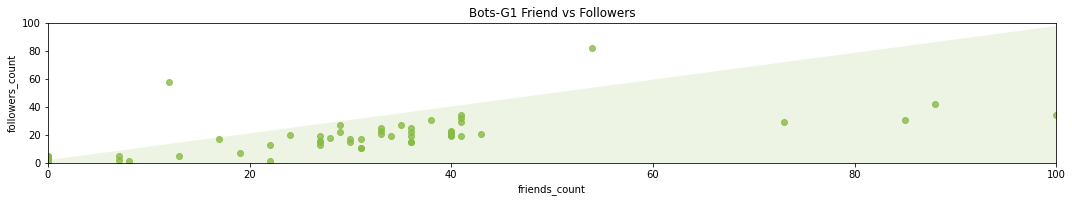

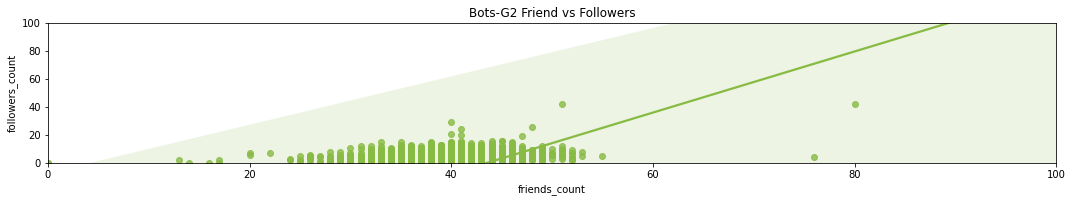

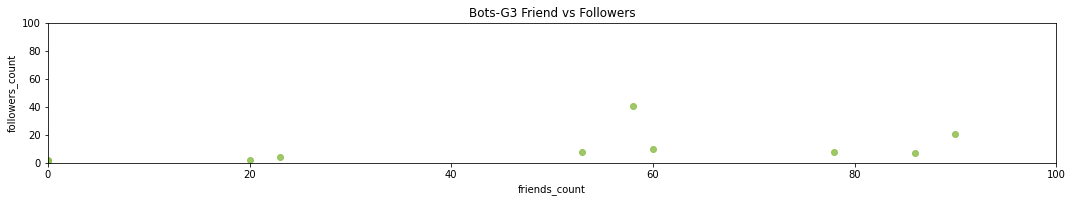

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(2,1,1)
plt.title('Legitimate User Friend vs Follower')
sns.regplot(user_data.friends_count, user_data.followers_count, color='#88BB44', label='Bots')
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.tight_layout()

plt.figure(figsize=(15,5))
plt.subplot(2,1,1)
plt.title('Bots-G1 Friend vs Followers')
sns.regplot(bot1_data.friends_count, bot1_data.followers_count, color='#88BB44', label='Bots')
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.tight_layout()

plt.figure(figsize=(15,5))
plt.subplot(2,1,1)
plt.title('Bots-G2 Friend vs Followers')
sns.regplot(bot2_data.friends_count, bot2_data.followers_count, color='#88BB44', label='Bots')
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.tight_layout()

plt.figure(figsize=(15,5))
plt.subplot(2,1,1)
plt.title('Bots-G3 Friend vs Followers')
sns.regplot(bot3_data.friends_count, bot3_data.followers_count, color='#88BB44', label='Bots')
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.tight_layout()


### **Interaction Level of Accounts**

In [ ]:
def plot(freq, plot_title, range_max):
    plt.figure(figsize=[10,4])
    range = (0, range_max)
    bins = 10
    plt.hist(freq, bins, range, color = 'grey', histtype = 'bar', rwidth = 0.8)
    plt.xlabel('Interaction')
    plt.xticks(np.arange(0, 4000, step=200))
    plt.ylabel('Accounts')
    plt.title(plot_title)

def makePlot(file_dir, plot_title):
    col_list = ["serial", "sequence"]
    df = pd.read_csv(file_dir, usecols = col_list)
    df['length'] = df.apply(lambda row: len(row.sequence), axis=1)
    max_len = df['length'].max()
    plot(df['length'], plot_title, max_len+200)

**1. Legitimate User**

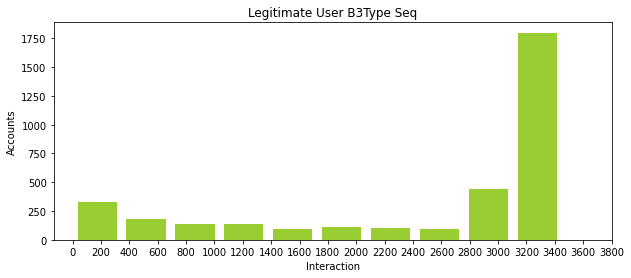

In [ ]:
makePlot("/content/drive/MyDrive/Projects/datasets_full.csv/dataset/sequence/genuine_user_b3_seq.csv", "Legitimate User B3Type Seq")

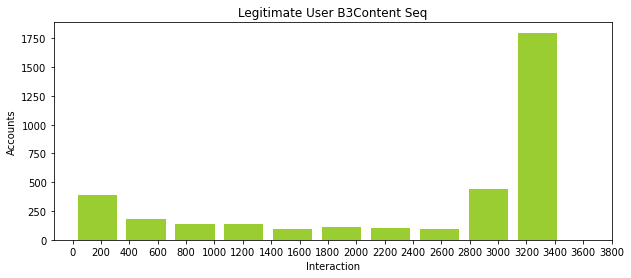

In [ ]:
makePlot("/content/drive/MyDrive/Projects/datasets_full.csv/dataset/sequence/genuine_user_content_b3_seq.csv", "Legitimate User B3Content Seq")

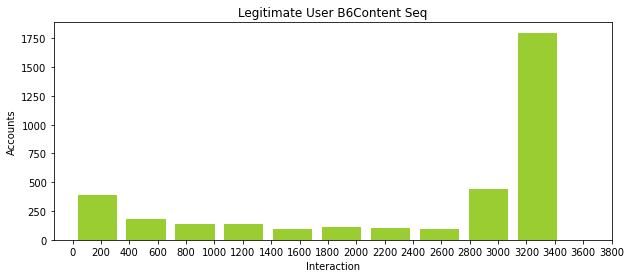

In [ ]:
makePlot("/content/drive/MyDrive/Projects/datasets_full.csv/dataset/sequence/genuine_user_content_b6_seq.csv", "Legitimate User B6Content Seq")

**2. Bot User Group - 1**

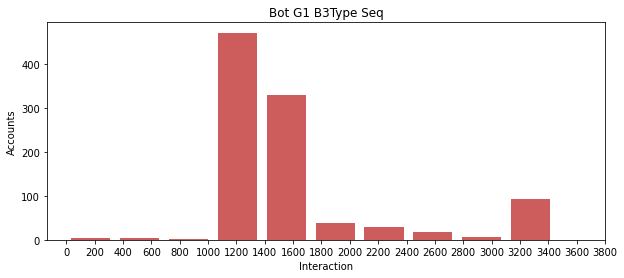

In [ ]:
makePlot("/content/drive/MyDrive/Projects/datasets_full.csv/dataset/sequence/bot1_user_b3_seq.csv", "Bot G1 B3Type Seq")

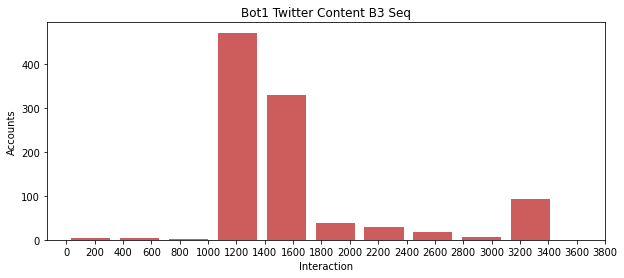

In [ ]:
makePlot("/content/drive/MyDrive/Projects/datasets_full.csv/dataset/sequence/bot1_user_content_b3_seq.csv", "Bot1 Twitter Content B3 Seq")

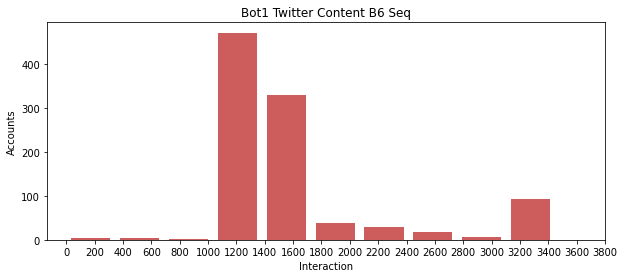

In [ ]:
makePlot("/content/drive/MyDrive/Projects/datasets_full.csv/dataset/sequence/bot1_user_content_b6_seq.csv", "Bot1 Twitter Content B6 Seq")

**3. Bot User Group - 2**

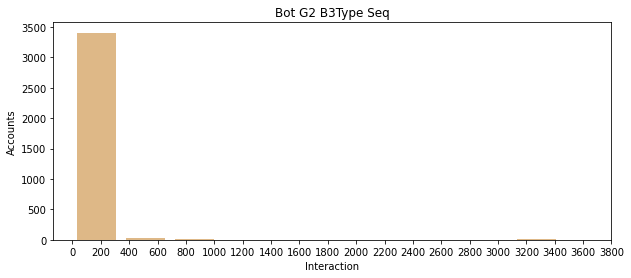

In [ ]:
makePlot("/content/drive/MyDrive/Projects/datasets_full.csv/dataset/sequence/bot2_user_b3_seq.csv", "Bot G2 B3Type Seq")

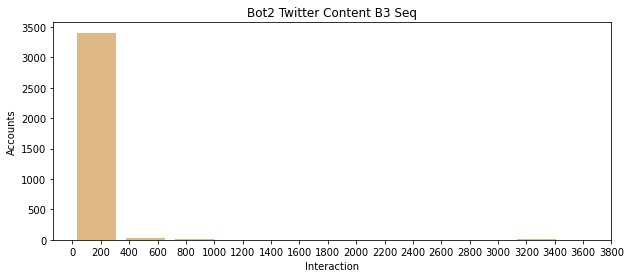

In [ ]:
makePlot("/content/drive/MyDrive/Projects/datasets_full.csv/dataset/sequence/bot2_user_content_b3_seq.csv", "Bot2 Twitter Content B3 Seq")

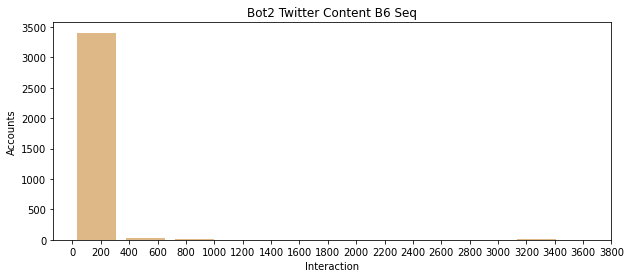

In [ ]:
makePlot("/content/drive/MyDrive/Projects/datasets_full.csv/dataset/sequence/bot2_user_content_b6_seq.csv", "Bot2 Twitter Content B6 Seq")

**4. Bot Group-3**

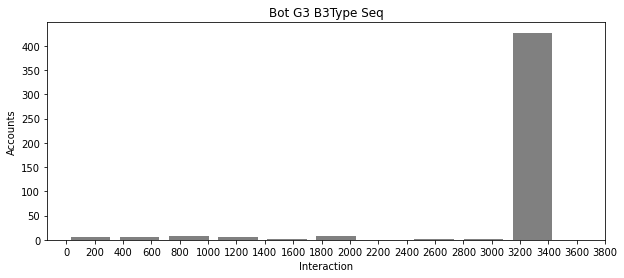

In [ ]:
makePlot("/content/drive/MyDrive/Projects/datasets_full.csv/dataset/sequence/bot3_user_b3_seq.csv", "Bot G3 B3Type Seq")

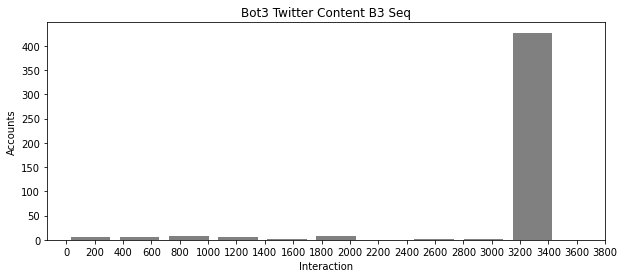

In [ ]:
makePlot("/content/drive/MyDrive/Projects/datasets_full.csv/dataset/sequence/bot3_user_content_b3_seq.csv", "Bot3 Twitter Content B3 Seq")

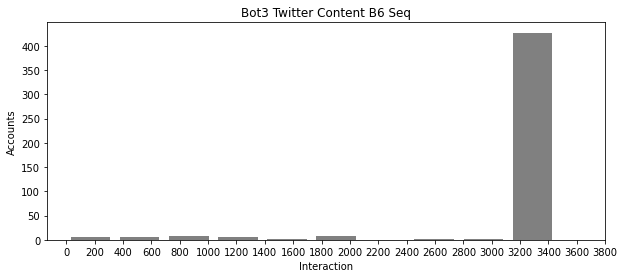

In [ ]:
makePlot("/content/drive/MyDrive/Projects/datasets_full.csv/dataset/sequence/bot3_user_content_b6_seq.csv", "Bot3 Twitter Content B6 Seq")

### **Plotting LCS Curve**

In [ ]:
def plot(x, y, plot_title):
    plt.figure(figsize=(10, 4))
    plt.plot(x, y, label='Data',color='grey')
    plt.xlabel('no. of strings')
    plt.ylabel('length')
    plt.title(plot_title)   
    plt.show()
    

def makePlot(file_dir, plot_title):
    col_list = ["num_of_strings", "lcs_length"]
    df = pd.read_csv(file_dir, usecols = col_list)
    print(df.head())
    plot(df['num_of_strings'], df['lcs_length'], plot_title)

**1. LCS Legitimate User**

   num_of_strings  lcs_length
0               2          17
1               3          16
2               4          16
3               5          16
4               6          16


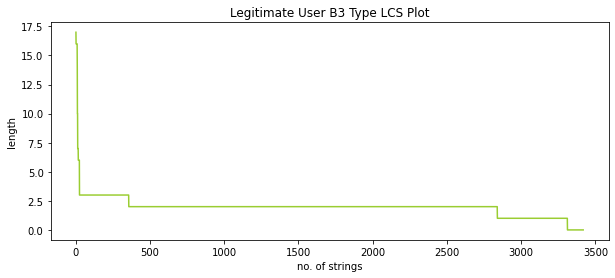

In [ ]:
makePlot("/content/drive/MyDrive/Projects/datasets_full.csv/dataset/lcs/user_b3_lcs.csv", "Legitimate User B3 Type LCS Plot")

   num_of_strings  lcs_length
0               2           4
1               3           2
2               4           2
3               5           1
4               6           1


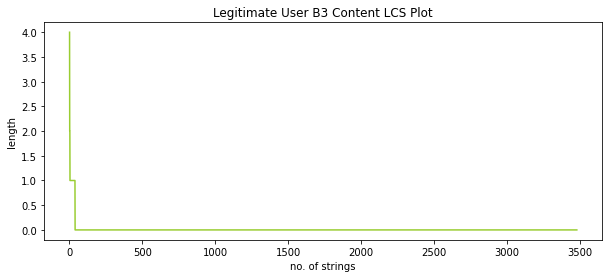

In [ ]:
makePlot("/content/drive/MyDrive/Projects/datasets_full.csv/dataset/lcs/user_content_b3_lcs.csv", "Legitimate User B3 Content LCS Plot")

   num_of_strings  lcs_length
0               2           4
1               3           2
2               4           2
3               5           1
4               6           1


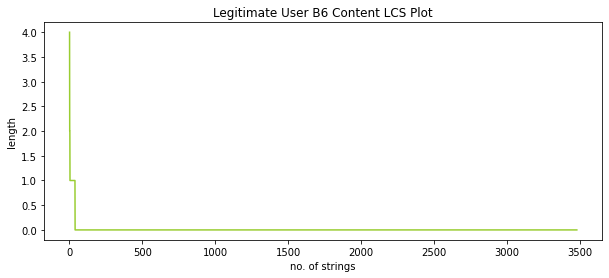

In [ ]:
makePlot("/content/drive/MyDrive/Projects/datasets_full.csv/dataset/lcs/user_content_b6_lcs.csv", "Legitimate User B6 Content LCS Plot")

**2. Bot User Group 1**

   num_of_strings  lcs_length
0               2         477
1               3         477
2               4         477
3               5         477
4               6         477


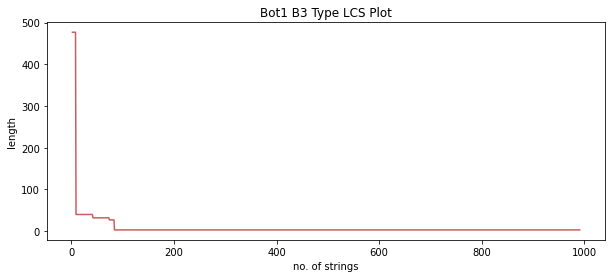

In [ ]:
makePlot("/content/drive/MyDrive/Projects/datasets_full.csv/dataset/lcs/bot1_b3_lcs.csv", "Bot1 B3 Type LCS Plot")

   num_of_strings  lcs_length
0               2          94
1               3          76
2               4           2
3               5           2
4               6           2


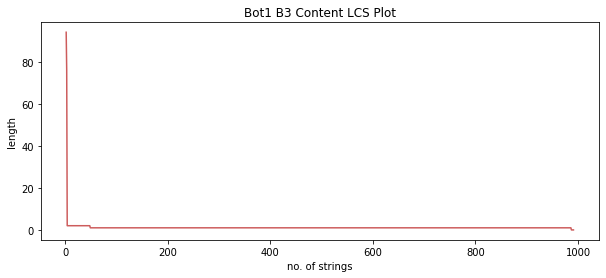

In [ ]:
makePlot("/content/drive/MyDrive/Projects/datasets_full.csv/dataset/lcs/bot1_content_b3_lcs.csv", "Bot1 B3 Content LCS Plot")

   num_of_strings  lcs_length
0               2          94
1               3          73
2               4           1
3               5           1
4               6           1


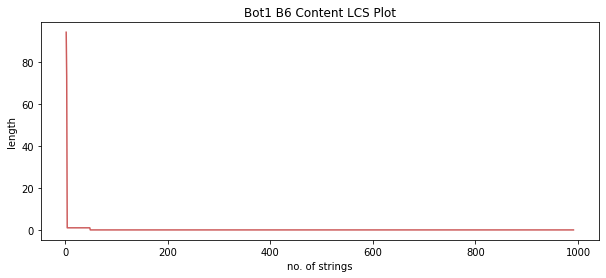

In [ ]:
makePlot("/content/drive/MyDrive/Projects/datasets_full.csv/dataset/lcs/bot1_content_b6_lcs.csv", "Bot1 B6 Content LCS Plot")

**3. Bot User Group 2**

   num_of_strings  lcs_length
0               2         135
1               3          36
2               4          16
3               5          14
4               6          14


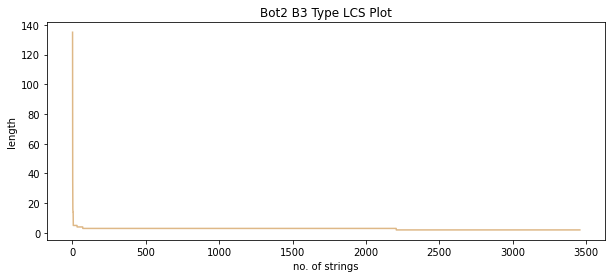

In [ ]:
makePlot("/content/drive/MyDrive/Projects/datasets_full.csv/dataset/lcs/bot2_b3_lcs.csv", "Bot2 B3 Type LCS Plot")

   num_of_strings  lcs_length
0               2          23
1               3          14
2               4          14
3               5          14
4               6           2


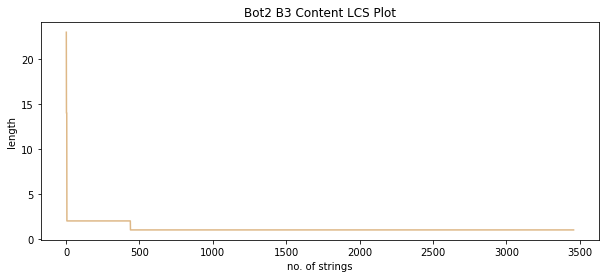

In [ ]:
makePlot("/content/drive/MyDrive/Projects/datasets_full.csv/dataset/lcs/bot2_content_b3_lcs.csv", "Bot2 B3 Content LCS Plot")

   num_of_strings  lcs_length
0               2          22
1               3           1
2               4           1
3               5           1
4               6           1


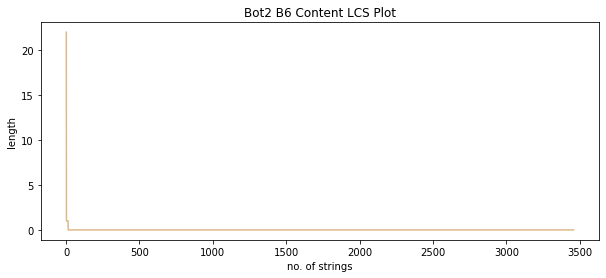

In [ ]:
makePlot("/content/drive/MyDrive/Projects/datasets_full.csv/dataset/lcs/bot2_content_b6_lcs.csv", "Bot2 B6 Content LCS Plot")

**4. Bot User Group 3**

   num_of_strings  lcs_length
0               2        3250
1               3        3250
2               4        3250
3               5        3250
4               6        3250


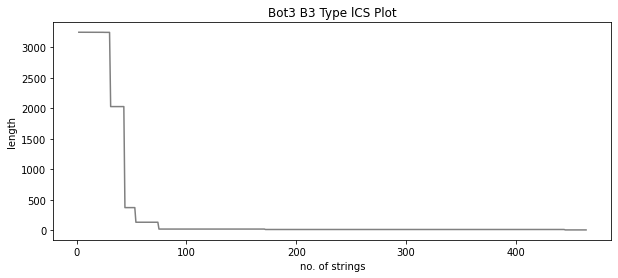

In [ ]:
makePlot("/content/drive/MyDrive/Projects/datasets_full.csv/dataset/lcs/bot3_b3_lcs.csv", "Bot3 B3 Type lCS Plot")

   num_of_strings  lcs_length
0               2          21
1               3          17
2               4          16
3               5          12
4               6          11


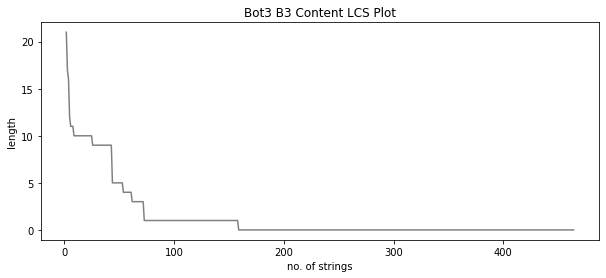

In [ ]:
makePlot("/content/drive/MyDrive/Projects/datasets_full.csv/dataset/lcs/bot3_content_b3_lcs.csv", "Bot3 B3 Content LCS Plot")

   num_of_strings  lcs_length
0               2          21
1               3          17
2               4          16
3               5          12
4               6          11


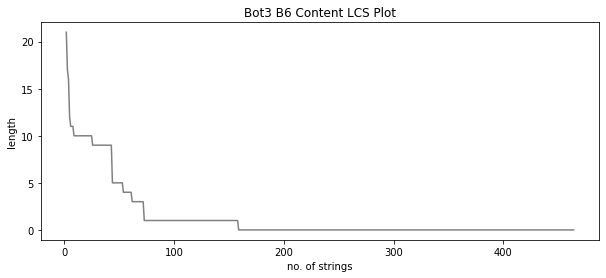

In [ ]:
makePlot("/content/drive/MyDrive/Projects/datasets_full.csv/dataset/lcs/bot3_content_b6_lcs.csv", "Bot3 B6 Content LCS Plot")

### **Calculating AUC**

In [ ]:
def calculate_auc(x_range, a, b, c):
    t1 = x_range[0]
    t2 = x_range[len(x_range)-1]
    print("t1 = ",t1)
    print("t2 = ",t2)
    auc = (a/(1-b)) * (pow(t2, 1-b) - pow(t1, 1-b)) + c * (t2 - t1)
    return auc

**1. Bot User Group 1**

In [ ]:
# bot1 b3 LCSs
col_list = ['num_of_strings']
source_file_path = "/content/drive/MyDrive/Projects/datasets_full.csv/dataset/lcs/bot1_b3_lcs.csv"
df = pd.read_csv(source_file_path, usecols = col_list)
x_range = df['num_of_strings']

a = 1.26673412*1000
b = 9.10666138/10
c = -2.89101426

bot1_b3_lcs_auc = calculate_auc(x_range, a,b,c)

t1 =  2
t2 =  991


In [ ]:
# bot1_content_b3_lcs
col_list = ['num_of_strings']
source_file_path = "/content/drive/MyDrive/Projects/datasets_full.csv/dataset/lcs/bot1_content_b3_lcs.csv"
df = pd.read_csv(source_file_path, usecols = col_list)
x_range = df['num_of_strings']

a = 477.33106927
b = 2.25318785
c = 0.98916567

bot1_content_b3_lcs_auc = calculate_auc(x_range, a,b,c)

t1 =  2
t2 =  991


In [ ]:
#bot1_content_b6_lcs
col_list = ['num_of_strings']
source_file_path = "/content/drive/MyDrive/Projects/datasets_full.csv/dataset/lcs/bot1_content_b6_lcs.csv"
df = pd.read_csv(source_file_path, usecols = col_list)
x_range = df['num_of_strings']

a = 2.36681544*100
b = 9.11458069*10
c = 2.14141497/10

bot1_content_b6_lcs_auc = calculate_auc(x_range, a,b,c)

t1 =  2
t2 =  991


**2. Bot User Group 2**

In [ ]:
#bot2_b3_lcs
col_list = ['num_of_strings']
source_file_path = "/content/drive/MyDrive/Projects/datasets_full.csv/dataset/lcs/bot2_b3_lcs.csv"
df = pd.read_csv(source_file_path, usecols = col_list)
x_range = df['num_of_strings']

a = 252.35969492
b = 80.3845435
c = 2.72222221

bot2_b3_lcs_auc = calculate_auc(x_range, a,b,c)


#bot2_content_b3_lcs
col_list = ['num_of_strings']
source_file_path = "/content/drive/MyDrive/Projects/datasets_full.csv/dataset/lcs/bot2_content_b3_lcs.csv"
df = pd.read_csv(source_file_path, usecols = col_list)
x_range = df['num_of_strings']

a = 40.25927765
b = 1.02371112
c = 1.06153093

bot2_content_b3_lcs_auc = calculate_auc(x_range, a,b,c)


#bot2_content_b6_lcs
col_list = ['num_of_strings']
source_file_path = "/content/drive/MyDrive/Projects/datasets_full.csv/dataset/lcs/bot2_content_b6_lcs.csv"
df = pd.read_csv(source_file_path, usecols = col_list)
x_range = df['num_of_strings']

a = 2.83572771*1000
b = 7.01078904
c = 3.04038695/1000

bot2_content_b6_lcs_auc = calculate_auc(x_range, a,b,c)


t1 =  2
t2 =  3457
t1 =  2
t2 =  3457
t1 =  2
t2 =  3457


**3. Bot User Group 3**

In [ ]:
#bot3_b3_lcs
col_list = ['num_of_strings']
source_file_path = "/content/drive/MyDrive/Projects/datasets_full.csv/dataset/lcs/bot3_b3_lcs.csv"
df = pd.read_csv(source_file_path, usecols = col_list)
x_range = df['num_of_strings']

a = 8.68028893*1000
b = 3.35658518/10
c = -1.34485178*1000

bot3_b3_lcs_auc = calculate_auc(x_range, a,b,c)


#bot3_content_b3_lcs
col_list = ['num_of_strings']
source_file_path = "/content/drive/MyDrive/Projects/datasets_full.csv/dataset/lcs/bot3_content_b3_lcs.csv"
df = pd.read_csv(source_file_path, usecols = col_list)
x_range = df['num_of_strings']

a = 34.90371667
b = 0.31338239
c = -5.93285711

bot3_content_b3_lcs_auc = calculate_auc(x_range, a,b,c)


#bot3_content_b6_lcs
col_list = ['num_of_strings']
source_file_path = "/content/drive/MyDrive/Projects/datasets_full.csv/dataset/lcs/bot3_content_b6_lcs.csv"
df = pd.read_csv(source_file_path, usecols = col_list)
x_range = df['num_of_strings']

a = 34.90371667
b = 0.31338239
c = -5.93285711

bot3_content_b6_lcs_auc = calculate_auc(x_range, a,b,c)


t1 =  2
t2 =  464
t1 =  2
t2 =  464
t1 =  2
t2 =  464


**4. Legitimate User**

In [ ]:
#user_b3_lcs
col_list = ['num_of_strings']
source_file_path = "/content/drive/MyDrive/Projects/datasets_full.csv/dataset/lcs/user_b3_lcs.csv"
df = pd.read_csv(source_file_path, usecols = col_list)
x_range = df['num_of_strings']

a = 30.58216252
b = 0.58492169
c = 1.35090249

user_b3_lcs_auc = calculate_auc(x_range, a,b,c)


#user_content_b3_lcs
col_list = ['num_of_strings']
source_file_path = "/content/drive/MyDrive/Projects/datasets_full.csv/dataset/lcs/user_content_b3_lcs.csv"
df = pd.read_csv(source_file_path, usecols = col_list)
x_range = df['num_of_strings']

a = 6.66004816
b = 0.83897044
c = -0.01912371

user_content_b3_lcs_auc = calculate_auc(x_range, a,b,c)


#user_content_b6_lcs
col_list = ['num_of_strings']
source_file_path = "/content/drive/MyDrive/Projects/datasets_full.csv/dataset/lcs/user_content_b6_lcs.csv"
df = pd.read_csv(source_file_path, usecols = col_list)
x_range = df['num_of_strings']

a = 6.66004816
b = 0.83897044
c = -0.01912371

user_content_b6_lcs_auc = calculate_auc(x_range, a,b,c)

t1 =  2
t2 =  3418
t1 =  2
t2 =  3479
t1 =  2
t2 =  3479


###**Average AUC**

In [ ]:
print('Type B3 Bot1',bot1_b3_lcs_auc)
print('Type B3 Bot2',bot2_b3_lcs_auc)
print('Type B3 Bot3',bot3_b3_lcs_auc)
print('Type B3 User',user_b3_lcs_auc)

print('Content B3 Bot1',bot1_content_b3_lcs_auc)
print('Content B3 Bot2',bot2_content_b3_lcs_auc)
print('Content B3 Bot3',bot3_content_b3_lcs_auc)
print('Content B3 User',user_content_b3_lcs_auc)

print('Content B6 Bot1',bot1_content_b6_lcs_auc)
print('Content B6 Bot2',bot2_content_b6_lcs_auc)
print('Content B6 Bot3',bot3_content_b6_lcs_auc)
print('Content B6 User',user_content_b6_lcs_auc)

avg_bot1_auc = (bot1_b3_lcs_auc + bot1_content_b3_lcs_auc + bot1_content_b6_lcs_auc)/3
avg_bot2_auc = (bot2_b3_lcs_auc + bot2_content_b3_lcs_auc + bot2_content_b6_lcs_auc)/3
avg_bot3_auc = (bot3_b3_lcs_auc + bot3_content_b3_lcs_auc + bot3_content_b6_lcs_auc)/3
avg_user_auc = (user_b3_lcs_auc + user_content_b3_lcs_auc + user_content_b6_lcs_auc)/3

print('Avg Bot1',avg_bot1_auc)
print('Avg Bot2',avg_bot2_auc)
print('Avg Bot3',avg_bot3_auc)
print('User',avg_user_auc)

Type B3 Bot1 8316.76358488591
Type B3 Bot2 9405.27773555
Type B3 Bot3 129978.02972955676
Type B3 User 6674.834538264662
Content B3 Bot1 1138.010335588981
Content B3 Bot2 3938.207749136785
Content B3 Bot3 620.9782983987793
Content B3 User 41.0263719810484
Content B6 Bot1 211.785940533
Content B6 Bot2 17.82106834183358
Content B6 Bot3 620.9782983987793
Content B6 User 41.0263719810484
Avg Bot1 3222.1866203359637
Avg Bot2 4453.7688510095395
Avg Bot3 43739.99544211811
User 2252.2957607422527


### **Observing Follower Frequecy**

Text(0.5, 1.0, 'Legitimate Follower Frequency')

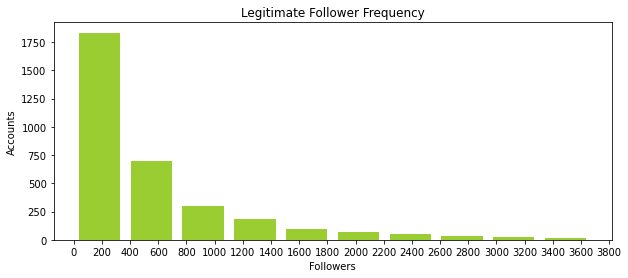

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Projects/datasets_full.csv/genuine_accounts.csv/users.csv", usecols=['id','followers_count'])
max_len = len(df)
range_max = max_len+200
range = (0, range_max)
bins = 10
plt.figure(figsize=[10,4])
plt.hist(df['followers_count'], bins, range, color = 'yellowgreen', histtype = 'bar', rwidth = 0.8)
plt.xlabel('Followers')
plt.xticks(np.arange(0, 4000, step=200))
plt.ylabel('Accounts')
plt.title("Legitimate Follower Frequency")

Text(0.5, 1.0, 'Bot User Group 1 Follower Frequency')

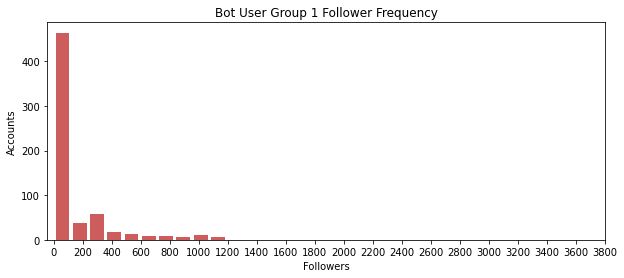

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Projects/datasets_full.csv/social_spambots_1.csv/users.csv", usecols=['id','followers_count'])
max_len = len(df)
range_max = max_len+200
range = (0, range_max)
bins = 10
plt.figure(figsize=[10,4])
plt.hist(df['followers_count'], bins, range, color = 'indianred', histtype = 'bar', rwidth = 0.8)
plt.xlabel('Followers')
plt.xticks(np.arange(0, 4000, step=200))
plt.ylabel('Accounts')
plt.title("Bot User Group 1 Follower Frequency")

Text(0.5, 1.0, 'Bot User Group 2 Follower Frequency')

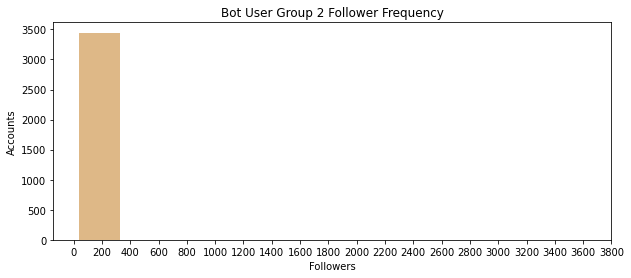

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Projects/datasets_full.csv/social_spambots_2.csv/users.csv", usecols=['id','followers_count'])
max_len = len(df)
range_max = max_len+200
range = (0, range_max)
bins = 10
plt.figure(figsize=[10,4])
plt.hist(df['followers_count'], bins, range, color = 'burlywood', histtype = 'bar', rwidth = 0.8)
plt.xlabel('Followers')
plt.xticks(np.arange(0, 4000, step=200))
plt.ylabel('Accounts')
plt.title("Bot User Group 2 Follower Frequency")

Text(0.5, 1.0, 'Bot User Group 3 Follower Frequency')

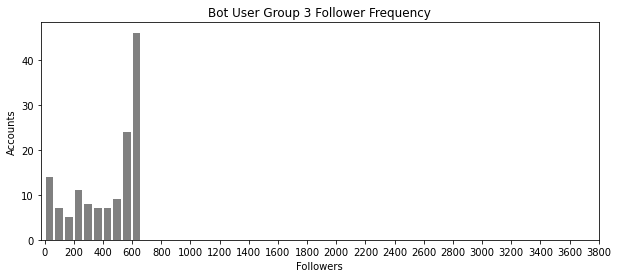

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Projects/datasets_full.csv/social_spambots_3.csv/users.csv", usecols=['id','followers_count'])
max_len = len(df)
range_max = max_len+200
range = (0, range_max)
bins = 10
plt.figure(figsize=[10,4])
plt.hist(df['followers_count'], bins, range, color = 'grey', histtype = 'bar', rwidth = 0.8)
plt.xlabel('Followers')
plt.xticks(np.arange(0, 4000, step=200))
plt.ylabel('Accounts')
plt.title("Bot User Group 3 Follower Frequency")

### **Observing Friend Frequecy**

Text(0.5, 1.0, 'Legitimate Friend Frequency')

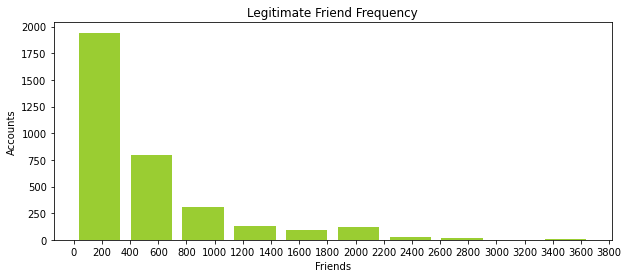

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Projects/datasets_full.csv/genuine_accounts.csv/users.csv", usecols=['id','friends_count'])
max_len = len(df)
range_max = max_len+200
range = (0, range_max)
bins = 10
plt.figure(figsize=[10,4])
plt.hist(df['friends_count'], bins, range, color = 'yellowgreen', histtype = 'bar', rwidth = 0.8)
plt.xlabel('Friends')
plt.xticks(np.arange(0, 4000, step=200))
plt.ylabel('Accounts')
plt.title("Legitimate Friend Frequency")

Text(0.5, 1.0, 'Bot User Group 1 Friends Frequency')

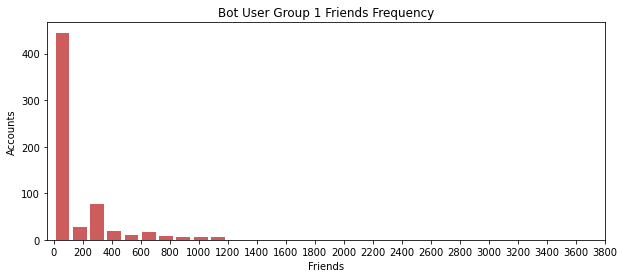

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Projects/datasets_full.csv/social_spambots_1.csv/users.csv", usecols=['id','friends_count'])
max_len = len(df)
range_max = max_len+200
range = (0, range_max)
bins = 10
plt.figure(figsize=[10,4])
plt.hist(df['friends_count'], bins, range, color = 'indianred', histtype = 'bar', rwidth = 0.8)
plt.xlabel('Friends')
plt.xticks(np.arange(0, 4000, step=200))
plt.ylabel('Accounts')
plt.title("Bot User Group 1 Friends Frequency")

Text(0.5, 1.0, 'Bot User Group 2 Friends Frequency')

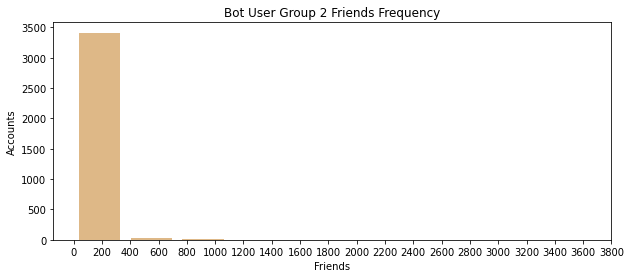

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Projects/datasets_full.csv/social_spambots_2.csv/users.csv", usecols=['id','friends_count'])
max_len = len(df)
range_max = max_len+200
range = (0, range_max)
bins = 10
plt.figure(figsize=[10,4])
plt.hist(df['friends_count'], bins, range, color = 'burlywood', histtype = 'bar', rwidth = 0.8)
plt.xlabel('Friends')
plt.xticks(np.arange(0, 4000, step=200))
plt.ylabel('Accounts')
plt.title("Bot User Group 2 Friends Frequency")

Text(0.5, 1.0, 'Bot User Group 3 Friends Frequency')

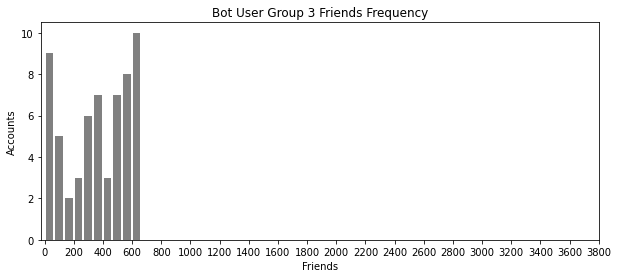

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Projects/datasets_full.csv/social_spambots_3.csv/users.csv", usecols=['id','friends_count'])
max_len = len(df)
range_max = max_len+200
range = (0, range_max)
bins = 10
plt.figure(figsize=[10,4])
plt.hist(df['friends_count'], bins, range, color = 'grey', histtype = 'bar', rwidth = 0.8)
plt.xlabel('Friends')
plt.xticks(np.arange(0, 4000, step=200))
plt.ylabel('Accounts')
plt.title("Bot User Group 3 Friends Frequency")

###**Done**.